In [1]:
import string
import matplotlib.pylab as plt
import numpy as np
from scipy import optimize

In [2]:
# setup the dictionary d
fp = open('Alice.txt', 'r')
d = dict()
line = fp.readline()

while(line):
    s = line.split()
    for word in s:
        #no punctuation
        word = word.translate(str.maketrans('', '', string.punctuation))
        #no upper case
        word = word.lower()
        if word in d:
            d[word] += 1
        else:
            d.update({word: 1})
    line = fp.readline()

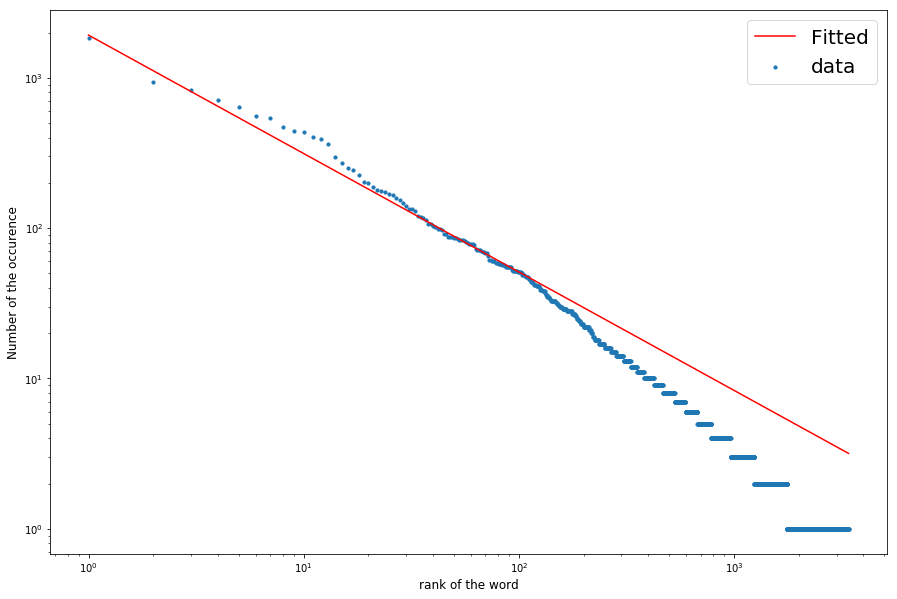

amp                 alpha               covariance          
1.92e+03            -0.788              [ 4.405E+01 -7.218E-03]
                                        [-7.218E-03  3.142E-06]


In [3]:
plt.figure(figsize=(15,10))
plt.loglog()
occ=list(d.values())
occ.sort(reverse = True)
word = len(occ)
rank = np.linspace(1, word, word)
plt.scatter(rank, occ, s=10, label="data")
plt.xlabel('rank of the word', fontsize='large')
plt.ylabel('Number of the occurence', fontsize='large')

def f(x, amp, alpha):
    return amp*x**alpha

params, params_covariance = optimize.curve_fit(f, rank, occ)
plt.plot(rank, f(rank, params[0], params[1]), "r", label="Fitted")
plt.legend(prop={'size':20})
plt.show()

# print out parameters
np.set_printoptions(formatter={'float': '{: .3E}'.format})
print('{:20}{:20}{:20}'.format('amp', 'alpha', 'covariance'))
print('{:<20.3}{:<20.3}{}'.format(params[0], params[1], params_covariance[0]))
print('{:40}{}'.format('', params_covariance[1]))

